# 第15章 奇异值分解

1.矩阵的奇异值分解是指将$m \times n$实矩阵$A$表示为以下三个实矩阵乘积形式的运算
$$A = U \Sigma V ^ { T }$$

其中$U$是$m$阶正交矩阵，$V$是$n$阶正交矩阵，$\Sigma$是$m \times n$矩形对角矩阵
$$\Sigma = \operatorname { diag } ( \sigma _ { 1 } , \sigma _ { 2 } , \cdots , \sigma _ { p } ) , \quad p = \operatorname { min } \{ m , n \}$$
其对角线元素非负，且满足$\sigma _ { 1 } \geq \sigma _ { 2 } \geq \cdots \geq \sigma _ { p } \geq 0$

2.任意给定一个实矩阵，其奇异值分解一定存在，但并不唯一。

3.奇异值分解包括紧奇异值分解和截断奇异值分解。紧奇异值分解是与原始矩阵等秩的奇异值分解，截断奇异值分解是比原始矩阵低秩的奇异值分解。

4.奇异值分解有明确的几何解释。奇异值分解对应三个连续的线性变换：一个旋转变换，一个缩放变换和另一个旋转变换第一个和第三个旋转变换分别基于空间的标准正交基进行。

5.设矩阵$A$的奇异值分解为$A = U \Sigma V ^ { T }$，则有$$\left. \begin{array} { l } { A ^ { T } A = V ( \Sigma ^ { T } \Sigma ) V ^ { T } } \\ { A A ^ { T } = U ( \Sigma \Sigma ^ { T } ) U ^ { T } } \end{array} \right.$$

即对称矩阵$A^TA$和$AA^T$的特征分解可以由矩阵$A$的奇异值分解矩阵表示。

6.矩阵$A$的奇异值分解可以通过求矩阵$A^TA$的特征值和特征向量得到：$A^TA$的特征向量构成正交矩阵$V$的列；从$A^TA$的特征值$\lambda _ { j }$的平方根得到奇异值$\sigma _ { i } $,即$$\sigma _ { j } = \sqrt { \lambda _ { j } } , \quad j = 1,2 , \cdots , n$$

对其由大到小排列，作为对角线元素，构成对角矩阵$\Sigma$;求正奇异值对应的左奇异向量，再求扩充的$A^T$的标准正交基，构成正交矩阵$U$的列。

7.矩阵$A = [ a _ { i j } ] _ { m \times n }$的弗罗贝尼乌斯范数定义为$$\| A \| _ { F } = ( \sum _ { i = 1 } ^ { m } \sum _ { j = 1 } ^ { n } ( a _ { i j } ) ^ { 2 } ) ^ { \frac { 1 } { 2 } }$$在秩不超过$k$的$m \times n$矩阵的集合中，存在矩阵$A$的弗罗贝尼乌斯范数意义下的最优近似矩阵$X$。秩为$k$的截断奇异值分解得到的矩阵$A_k$能够达到这个最优值。奇异值分解是弗罗贝尼乌斯范数意义下，也就是平方损失意义下的矩阵最优近似。

8.任意一个实矩阵$A$可以由其外积展开式表示$$A = \sigma _ { 1 } u _ { 1 } v _ { 1 } ^ { T } + \sigma _ { 2 } u _ { 2 } v _ { 2 } ^ { T } + \cdots + \sigma _ { n } u _ { n } v _ { n } ^ { T }$$
其中$u _ { k } v _ { k } ^ { T }$为$m \times n$矩阵，是列向量$u _ { k }$和行向量$v _ { k } ^ { T }$的外积，$\sigma _ { k }$为奇异值，$u _ { k } , v _ { k } ^ { T } , \sigma _ { k }$通过矩阵$A$的奇异值分解得到。

---
任意一个$m$ x $n$ 矩阵，都可以表示为三个矩阵的乘积（因子分解）形式，分别是$m$阶**正交矩阵**，由**降序**排列的**非负**的对角线元素组成的$m$ x $n$ 矩形对角矩阵，和$n$阶**正交矩阵**，称为该矩阵的奇异值分解。矩阵的奇异值分解一定存在，但不唯一。  

奇异值分解可以看作是矩阵数据压缩的一种方法，即用因子分解的方式近似地表示原始矩阵，这种近似是在平方损失意义下的最优近似。

矩阵的奇异值分解是指，将一个非零的$m$ x $n$ **实矩阵**$A, A\in R^{m\times n}$表示为一下三个实矩阵乘积形式的运算：  
$A = U\Sigma V^{T}$,  
其中 $U$ 是 $m$ 阶正交矩阵， $V$ 是 $n$ 阶正交矩阵，$\Sigma$ 是由降序排列的非负的对角线元素组成的$m$ x $n$矩形对角矩阵。称为$A$ 的奇异值分解。 $U$的列向量称为左奇异向量， $V$的列向量称为右奇异向量。  

奇异值分解不要求矩阵$A$ 是方阵，事实上矩阵的奇异值分解可以看作方阵的对角化的推广。  

**紧奇奇异值分解**是与原始矩阵等秩的奇异值分解， **截断奇异值分解**是比原始矩阵低秩的奇异值分解。

---------------------------------------------------------------------------------------------------------------------------------

In [1]:
# 实现奇异值分解， 输入一个numpy矩阵，输出 U, sigma, V
# https://zhuanlan.zhihu.com/p/54693391

import numpy as np


#基于矩阵分解的结果，复原矩阵
def rebuildMatrix(U, sigma, V):
    a = np.dot(U, sigma)
    a = np.dot(a, np.transpose(V))
    return a


#基于特征值的大小，对特征值以及特征向量进行排序。倒序排列
def sortByEigenValue(Eigenvalues, EigenVectors):
    index = np.argsort(-1 * Eigenvalues)
    Eigenvalues = Eigenvalues[index]
    EigenVectors = EigenVectors[:, index]
    return Eigenvalues, EigenVectors


#对一个矩阵进行奇异值分解
def SVD(matrixA, NumOfLeft=None):
    #NumOfLeft是要保留的奇异值的个数，也就是中间那个方阵的宽度
    #首先求transpose(A)*A
    matrixAT_matrixA = np.dot(np.transpose(matrixA), matrixA)
    #然后求右奇异向量
    lambda_V, X_V = np.linalg.eig(matrixAT_matrixA)
    lambda_V, X_V = sortByEigenValue(lambda_V, X_V)
    #求奇异值
    sigmas = lambda_V
    sigmas = list(map(lambda x: np.sqrt(x)
                      if x > 0 else 0, sigmas))  #python里很小的数有时候是负数
    sigmas = np.array(sigmas)
    sigmasMatrix = np.diag(sigmas)
    if NumOfLeft == None:
        rankOfSigmasMatrix = len(list(filter(lambda x: x > 0,
                                             sigmas)))  #大于0的特征值的个数
    else:
        rankOfSigmasMatrix = NumOfLeft
    sigmasMatrix = sigmasMatrix[0:rankOfSigmasMatrix, :]  #特征值为0的奇异值就不要了

    #计算右奇异向量
    X_U = np.zeros(
        (matrixA.shape[0], rankOfSigmasMatrix))  #初始化一个右奇异向量矩阵，这里直接进行裁剪
    for i in range(rankOfSigmasMatrix):
        X_U[:, i] = np.transpose(np.dot(matrixA, X_V[:, i]) / sigmas[i])

    #对右奇异向量和奇异值矩阵进行裁剪
    X_V = X_V[:, 0:NumOfLeft]
    sigmasMatrix = sigmasMatrix[0:rankOfSigmasMatrix, 0:rankOfSigmasMatrix]
    #print(rebuildMatrix(X_U, sigmasMatrix, X_V))

    return X_U, sigmasMatrix, X_V

In [9]:
A = np.array([[1, 1, 1, 2, 2], [0, 0, 0, 3, 3], [0, 0, 0, 1, 1], [1, 1, 1, 0, 0],
              [2, 2, 2, 0, 0], [5, 5, 5, 0, 0], [1, 1, 1, 0, 0]])

A

array([[1, 1, 1, 2, 2],
       [0, 0, 0, 3, 3],
       [0, 0, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [2, 2, 2, 0, 0],
       [5, 5, 5, 0, 0],
       [1, 1, 1, 0, 0]])

In [10]:
X_U, sigmasMatrix, X_V = SVD(A, NumOfLeft=3)

In [11]:
X_U

array([[ 1.96602638e-01, -5.12980706e-01, -6.20066911e-09],
       [ 3.08997616e-02, -8.04794293e-01,  1.69140901e-09],
       [ 1.02999205e-02, -2.68264764e-01,  5.63803005e-10],
       [ 1.76002797e-01,  2.35488225e-02, -7.63159275e-09],
       [ 3.52005594e-01,  4.70976451e-02, -1.52631855e-08],
       [ 8.80013984e-01,  1.17744113e-01, -3.81579637e-08],
       [ 1.76002797e-01,  2.35488225e-02, -7.63159275e-09]])

In [12]:
sigmasMatrix

array([[9.81586105e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.25821946e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.16381789e-07]])

In [13]:
X_V

array([[ 5.75872999e-01,  4.12749590e-02,  8.16496581e-01],
       [ 5.75872999e-01,  4.12749590e-02, -4.08248290e-01],
       [ 5.75872999e-01,  4.12749590e-02, -4.08248290e-01],
       [ 5.05512944e-02, -7.05297502e-01,  3.28082013e-17],
       [ 5.05512944e-02, -7.05297502e-01,  3.28082013e-17]])

In [14]:
# rebuild from U, sigma, V

rebuildMatrix(X_U, sigmasMatrix, X_V)

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         2.00000000e+00,  2.00000000e+00],
       [ 5.39915464e-17,  7.72260438e-16, -7.54662738e-16,
         3.00000000e+00,  3.00000000e+00],
       [ 9.57429619e-18,  2.48997260e-16, -2.59977132e-16,
         1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.25546281e-17,  1.25546281e-17],
       [ 2.00000000e+00,  2.00000000e+00,  2.00000000e+00,
         2.51092563e-17,  2.51092563e-17],
       [ 5.00000000e+00,  5.00000000e+00,  5.00000000e+00,
         9.74347659e-18,  9.74347659e-18],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.38777878e-17,  1.38777878e-17]])

same as A.

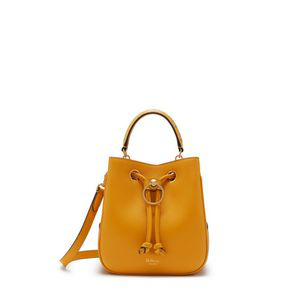

In [8]:
from PIL import Image
import requests
from io import BytesIO

url = 'https://images.mulberry.com/i/mulberrygroup/RL5792_000N651_L/small-hampstead-deep-amber-small-classic-grain-ayers/small-hampstead-deep-amber-small-classic-grain-ayers?v=3&w=304'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

----
本章代码来源：https://github.com/hktxt/Learn-Statistical-Learning-Method

本文代码更新地址：https://github.com/fengdu78/lihang-code

中文注释制作：机器学习初学者公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)